## Data Storytelling

**FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [2]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [3]:
table = pd.crosstab(df.Year, df.Occupation, normalize='index')
table

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


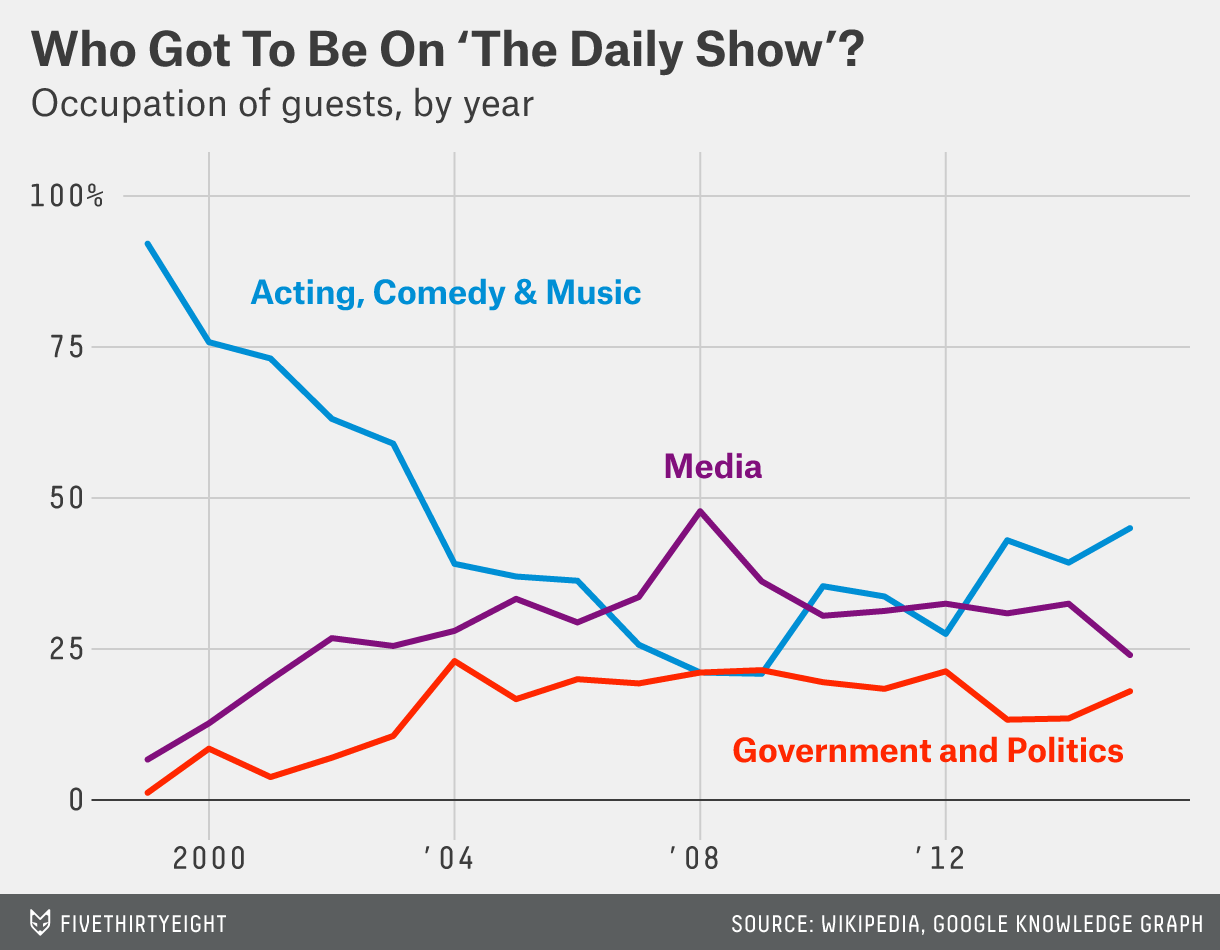

In [4]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [5]:
three_occupations = table.drop(columns='Other')

In [6]:
three_occupations.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.903614,0.012048,0.066265
2000,0.739645,0.082840,0.124260
2001,0.726115,0.038217,0.197452
2002,0.622642,0.069182,0.264151
2003,0.560241,0.102410,0.246988


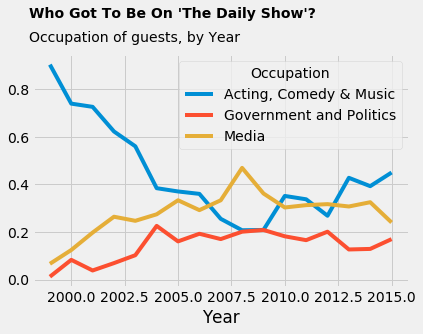

In [17]:
plt.style.use('fivethirtyeight')
three_occupations.plot()
plt.text(x=1998, y=1.1, s="Who Got To Be On 'The Daily Show'?", fontweight='bold')
plt.text(x=1998, y=1, s='Occupation of guests, by Year');

### Matplotlib

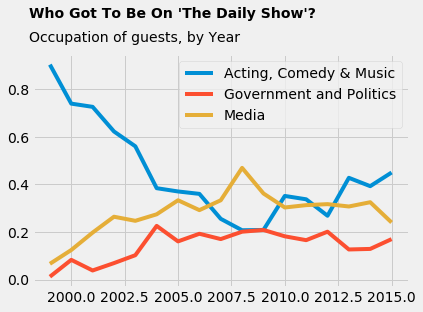

In [28]:
plt.plot(three_occupations['Acting, Comedy & Music'])
plt.plot(three_occupations['Government and Politics'])
plt.plot(three_occupations['Media'])
plt.legend(three_occupations.columns)
plt.text(x=1998, y=1.1, s="Who Got To Be On 'The Daily Show'?", fontweight='bold')
plt.text(x=1998, y=1, s='Occupation of guests, by Year')
plt.savefig("my_538.png")
plt.show()

In [18]:
import seaborn as sns
sns.__version__

'0.9.0'

Text(1998,1,'Occupation of guests, by Year')

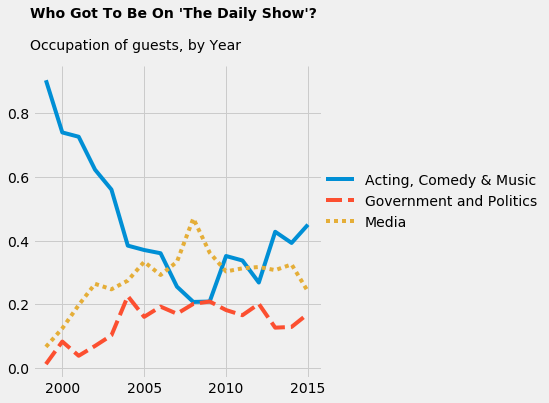

In [21]:
sns.relplot(data=three_occupations, kind='line')
plt.text(x=1998, y=1.1, s="Who Got To Be On 'The Daily Show'?", fontweight='bold')
plt.text(x=1998, y=1, s='Occupation of guests, by Year')

### Seaborn alternative

In [25]:
# Moves 'Year' from the index to a columns
with_year_column = three_occupations.reset_index()

# Transforms the data from "wide format" to "long format" (tidy)
long_format = with_year_column.melt(id_vars='Year')

long_format.head()

,Year,Occupation,value
0,1999,"Acting, Comedy & Music",0.903614
1,2000,"Acting, Comedy & Music",0.739645
2,2001,"Acting, Comedy & Music",0.726115
3,2002,"Acting, Comedy & Music",0.622642
4,2003,"Acting, Comedy & Music",0.560241


Text(1998,1,'Occupation of guests, by Year')

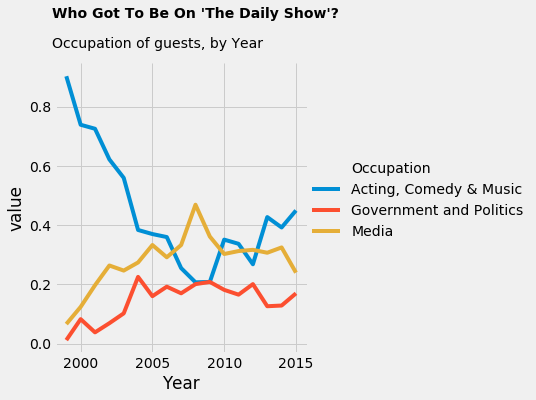

In [27]:
sns.relplot(x='Year', y='value', hue='Occupation', data=long_format, kind='line')
plt.text(x=1998, y=1.1, s="Who Got To Be On 'The Daily Show'?", fontweight='bold')
plt.text(x=1998, y=1, s='Occupation of guests, by Year')

### Who were the top 10 guests on _The Daily Show_?